In [1]:
import pandas as pd
import os
from imageio import imread
from matplotlib import pyplot as plt
from skimage import segmentation, morphology
import numpy as np

In [2]:
df = pd.read_csv('/home/haoxu/data/test_data_20201218/40x_processed/quantify_all.csv')

In [3]:
df

,well_id,well_fovs,nuclei_file,er_file,virus_file,mask_file,cell_idx,cell_size,cell_integ,cell_mean
0,r08c22,r08c22f01,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,1,1236,209877,169.803398
1,r08c22,r08c22f01,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,2,2267,809656,357.148655
2,r08c22,r08c22f01,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,3,1106,222165,200.872514
3,r08c22,r08c22f01,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,4,2428,856239,352.651977
4,r08c22,r08c22f01,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,5,2393,2857153,1193.962808
...,...,...,...,...,...,...,...,...,...,...
267,r08c22,r08c22f02,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,26,13727,8340350,607.587237
268,r08c22,r08c22f02,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,27,12245,2100051,171.502736
269,r08c22,r08c22f02,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,28,3839,449284,117.031519
270,r08c22,r08c22f02,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x/r08c22...,/home/haoxu/data/test_data_20201218/40x_proces...,29,3123,523543,167.641050


In [ ]:
df.iloc[0].nuclei_file

In [39]:
nuclei_image = imread(df.iloc[0].nuclei_file)
er_image = imread(df.iloc[0].er_file)
virus_image = imread(df.iloc[0].virus_file)
mask_image = imread(df.iloc[0].mask_file)

In [20]:
nuclei_image.shape

(1080, 1080)

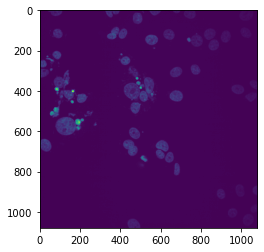

In [19]:
plt.imshow(nuclei_image)

In [43]:
mask_contour = segmentation.find_boundaries(mask_image)
mask_contour = morphology.binary_dilation(
        mask_contour, selem=np.full((2, 2), 1)
    ).astype("uint16") * (virus_image.max())
#combined_images = np.concatenate(([mask_contour], [mask_contour], [nuclei_image]), axis=0)
combined_images = np.dstack((virus_image, mask_contour, er_image))
#combined_images = combined_images.transpose(1, 2, 0)

In [28]:
combined_images.shape

(1080, 1080, 3)

In [30]:
combined_images.dtype

dtype('uint16')

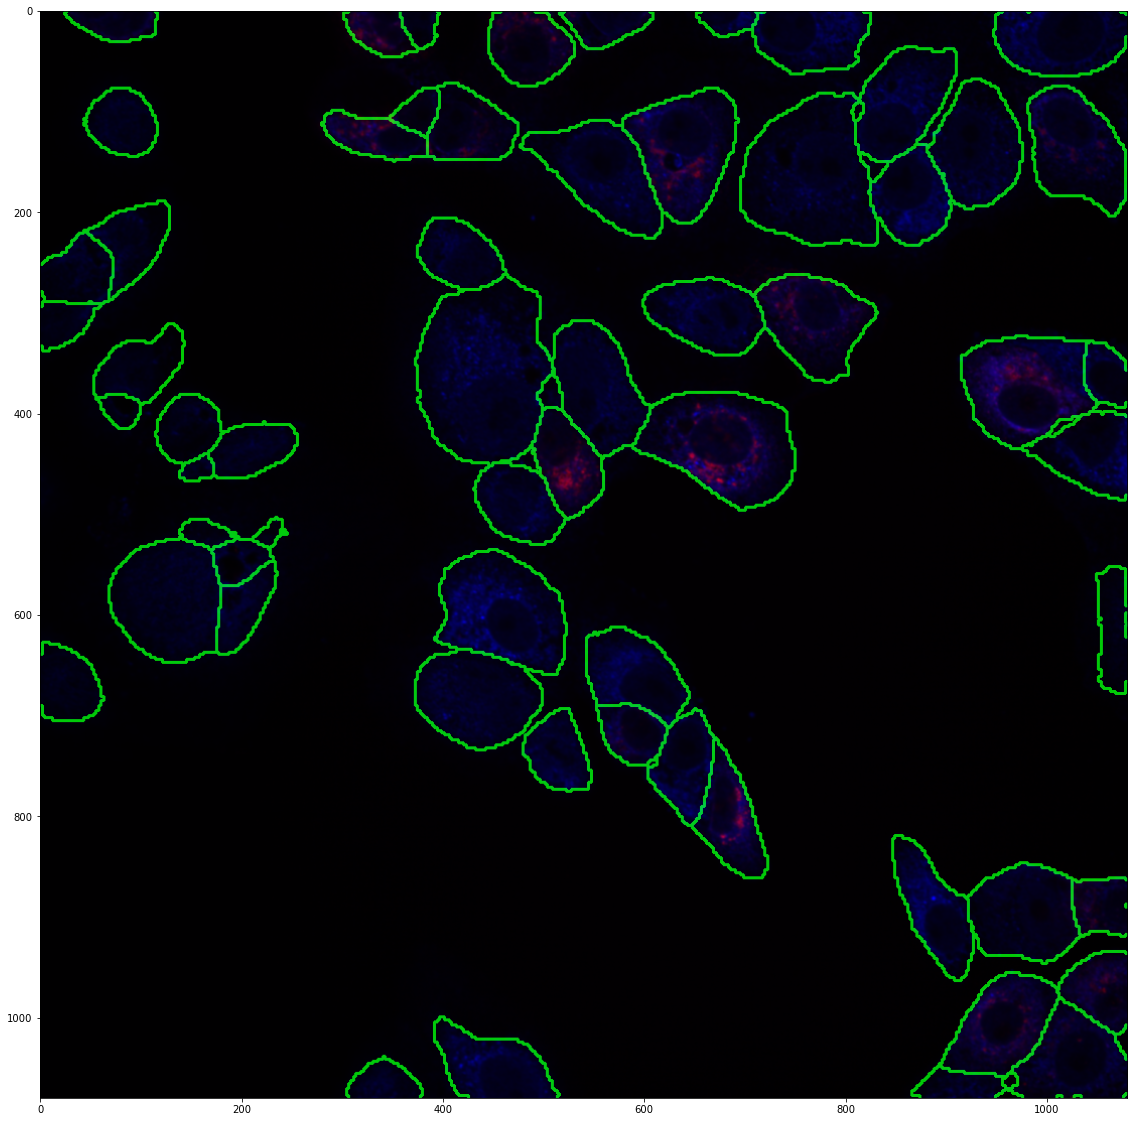

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
#ax = axes.ravel()
axes.imshow(combined_images/combined_images.max())

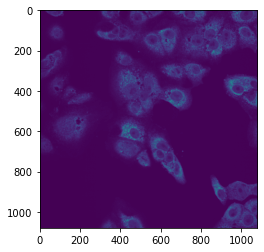

In [35]:
plt.imshow(er_image/er_image.max())

In [34]:
er_image.max()

18693

### next step
#### still use the last 20 percent or so, median value to define the threshold for infection
#### then verify by checking the output